# Variational principle
Code implementing the variational principle for a 1D potential.
To try different things, change:
- the potential function V
- the wavefunction psi
- the initial guess of the wavefunction parameters aguess

This file has the solution to the last part of HW7

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import numdifftools as nd
from scipy.optimize import minimize
from scipy.integrate import quad
#from scipy.misc import derivative

In [3]:
# some constants.  Changing mass will also change the energy scale.
#hbar = 1.055e-34 # Planck's constant (J s)
#mass = 1e-30 #  electron mass (kg)
#L = 1e-9 # well half-width (m)
#V0 = 1.6e-19 # well depth (J)
# rescaled units:
hbar =1.0
mass = 1.0


Set up the problem we're solving

In [4]:
# Define the potential energy function

# some constants for the potential
L = 1.0
V0 = 18*hbar**2/(2*mass*L**2)

# domain of the potential
xmin = -10*L; xmax = 10*L #limits of integration, may be np.inf (infinity)

# The potential energy function itself
def V(x):
    # this example is the finite square well
    # make sure this function is "vectorizable" and does not have any division by zero
    return np.piecewise(x, [np.abs(x)<= L, np.abs(x)>L],[0.0,V0])

bad_points = [-L,L] # list of x values where discontinuities happen in V

In [5]:
# Define the trial ground state wavefunction
def psi(x,a):
    '''Wavefunction as a function of position x.
    The array "a" stores any parameters.'''
    # Note, normalization is not necessary
    psi = np.piecewise(x,[np.abs(x*a[0])<1.0,np.abs(x*a[0])>=1.0],[1.0+np.cos(a[0]*np.pi*x),0.0])# cosine piece
    #psi = np.exp(-x**2*a[0]) # gaussian
    return psi

In [6]:
a_guess = [0.95/L] # initial guess of the arguments that minimize the wavefunction

Do the calculations...

In [7]:
def Hpsi(psi,x,a):
    '''The Hamiltonian acting on psi at point x'''
    return -0.5*hbar**2/mass *nd.Derivative(lambda x: psi(x,a), n=2)(x) + V(x)*psi(x,a)

In [8]:
def EVH(a, psi):
    '''Expectation value of the Hamiltonian for wavefunction psi that has the arguments a
    psi is a function of x and a
    a is a list of parameters for the wavefunction'''
    # Calculate normalization of psi
    norm = quad(lambda x :np.abs(psi(x,a))**2, xmin, xmax, points=bad_points)[0]
    ev = quad(lambda x :np.conj(psi(x,a))*Hpsi(psi, x,a), xmin, xmax,points=bad_points)[0]
    return ev/norm

In [9]:
# Calculate the expectation value of energy for our initial guess
initEV = EVH(a_guess,psi)
print("Initial energy of guess = {}".format(initEV))

Initial energy of guess = 1.4845628466659937


In [10]:
# minimize the expectation value of energy by changing a_guess
# `output` has two pieces
# `output.x` is the list of parameters (what I called a above)
output = minimize(EVH, a_guess, args=(psi,))

In [11]:
# build arrays for plotting x, V(x), and psi(x)
# these are only used for plotting
xlist = np.linspace(xmin, xmax, 101)
ylist = np.array([V(x) for x in xlist])

# intital and final wavefunctions
psilist = np.array([psi(x,a_guess) for x in xlist])
outlist = np.array([psi(x,output.x) for x in xlist])

# probability density functions of t
problist = np.array([np.abs(psi(x,output.x))**2 for x in xlist])


In [12]:
print(f"Minimum energy: {output.fun:#.4g} for arguments {[f'{x:#.4g}' for x in output.x]}")

Minimum energy: 0.8251 for arguments ['0.6345']


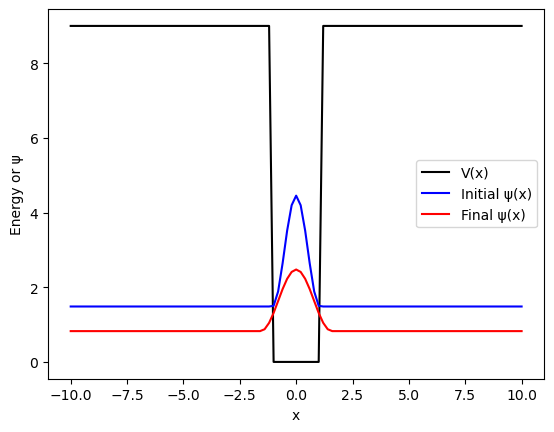

In [13]:
fig = plt.figure()
plt.plot(xlist,ylist,'k-', label = "V(x)")
plt.plot(xlist,(psilist+1)*initEV,'b-', label = "Initial ψ(x)")
plt.plot(xlist,(outlist+1)*output.fun,'r-', label = "Final ψ(x)")
#plt.plot(xlist,problist+output.fun, 'g-', label = "|ψ(x)|^2")
plt.legend();
plt.xlabel("x");
plt.ylabel("Energy or ψ");
